In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [11]:
df = train

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
#Data Preprocessisng
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#Treating Missing values for "Gender"
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
df["Gender"] = df["Gender"].replace(np.nan,"Male")

In [16]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [17]:
df["Married"] = df["Married"].replace(np.nan,"Yes")

In [18]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
df["Dependents"] = df["Dependents"].replace(np.nan,0)

In [20]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
df["Self_Employed"] = df["Self_Employed"].replace(np.nan , "No")

In [22]:
df["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [23]:
df["LoanAmount"] = df["LoanAmount"].replace(np.nan , df["LoanAmount"].mean())

In [24]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [25]:
df["Loan_Amount_Term"] =df["Loan_Amount_Term"].replace(np.nan , df["Loan_Amount_Term"].max())

In [26]:
df["Credit_History"] =df["Credit_History"].replace(np.nan , df["Credit_History"].max())

In [27]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


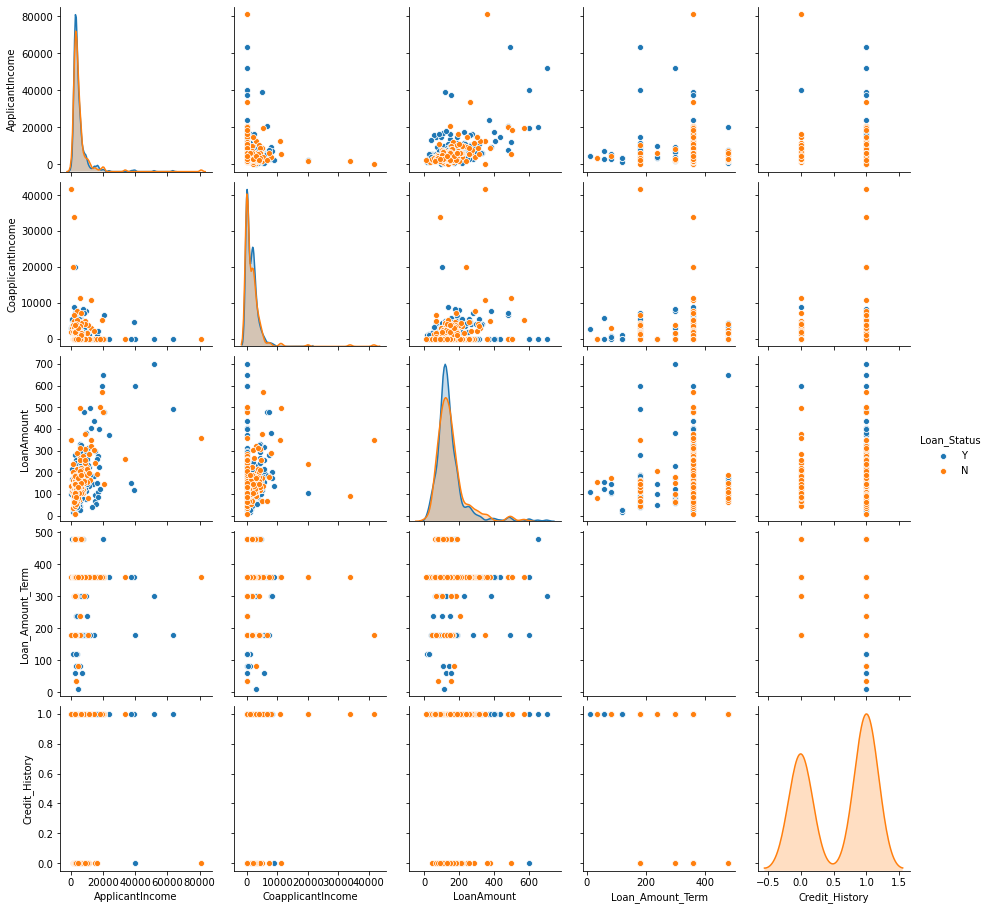

In [28]:
sns.pairplot(df, hue ="Loan_Status")

In [29]:
def part(x):
    if x=="Graduate":
        return 1
    else:
        return 0
df['Education']=df['Education'].map( part)
def part1(x1):
    if x1=="No":
        return 0
    else:
        return 1
df['Self_Employed']=df['Self_Employed'].map(part1)
data = df.drop(["Loan_ID"],axis =1)

In [30]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [31]:
data = pd.get_dummies(data)

In [32]:
data = data.drop(["Gender_Male","Loan_Status_N"],axis = 1)

In [33]:
data = data.drop(["Dependents_0"], axis =1)

In [34]:
data.head(2)

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Married_No,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,5849,0.0,146.412162,360.0,1.0,0,1,0,0,0,0,0,0,1,1
1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,1,1,0,0,1,0,0,0


In [35]:
y = data["Loan_Status_Y"]

In [36]:
X = data.drop(["Loan_Status_Y"],axis =1)

In [37]:
from sklearn.model_selection import train_test_split 
X_train , X_test,y_train , y_test = train_test_split(X,y, random_state =2,test_size = 0.25)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14 37]
 [22 81]]
              precision    recall  f1-score   support

           0       0.39      0.27      0.32        51
           1       0.69      0.79      0.73       103

    accuracy                           0.62       154
   macro avg       0.54      0.53      0.53       154
weighted avg       0.59      0.62      0.60       154



**Naive Bayes**

In [41]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [42]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22 29]
 [ 5 98]]
              precision    recall  f1-score   support

           0       0.81      0.43      0.56        51
           1       0.77      0.95      0.85       103

    accuracy                           0.78       154
   macro avg       0.79      0.69      0.71       154
weighted avg       0.79      0.78      0.76       154



**Decision Tree**

In [43]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [44]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25 26]
 [15 88]]
              precision    recall  f1-score   support

           0       0.62      0.49      0.55        51
           1       0.77      0.85      0.81       103

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



**Random Forest**

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [46]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20 31]
 [ 5 98]]
              precision    recall  f1-score   support

           0       0.80      0.39      0.53        51
           1       0.76      0.95      0.84       103

    accuracy                           0.77       154
   macro avg       0.78      0.67      0.69       154
weighted avg       0.77      0.77      0.74       154



**Among the classifer algorithms Bayes shows better results**

In [47]:
classifier = GaussianNB()
classifier.fit(X, y)


GaussianNB()

In [48]:
test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [49]:
df = test

In [50]:
def part(x):
    if x=="Graduate":
        return 1
    else:
        return 0
df['Education']=df['Education'].map( part)
def part1(x1):
    if x1=="No":
        return 0
    else:
        return 1
df['Self_Employed']=df['Self_Employed'].map(part1)
data = df.drop(["Loan_ID"],axis =1)

In [51]:
y_pred = classifier.predict(X)

In [52]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [53]:
sample=pd.read_csv("sample_submission.csv")

FileNotFoundError: [Errno 2] File sample_submission.csv does not exist: 'sample_submission.csv'

In [ ]:
df=pd.DataFrame(y_pred)

sample['Loan_Status']=df.iloc[:,0]



In [ ]:
def part(x):
    if x==1:
        return "Y"
    else:
        return "N"

In [ ]:
sample['Loan_Status']=sample['Loan_Status'].map(part)

In [ ]:
sample.head(8)

In [ ]:
sample = sample.drop(["Unnamed: 0"],axis = 1)

In [ ]:
sample.to_csv("sample_submission_NaiveBayes.csv")


In [ ]:
sample.to_csv()